<a href="https://colab.research.google.com/github/engphb/Python/blob/main/COM702_Trabalho_Final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext nb_black
%matplotlib notebook

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [ ]:
# pd.options.display.float_format = "{:,.4f}".format
plt.rcParams.update({"figure.max_open_warning": False})

<IPython.core.display.Javascript object>

# Importação dos dados

In [ ]:
df = pd.read_csv(
    "airfoil_self_noise.dat",
    sep="\t",
    names=["freq", "ang", "corda", "vel", "larg_suc", "press"],
)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freq      1503 non-null   int64  
 1   ang       1503 non-null   float64
 2   corda     1503 non-null   float64
 3   vel       1503 non-null   float64
 4   larg_suc  1503 non-null   float64
 5   press     1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


,freq,ang,corda,vel,larg_suc,press
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


<IPython.core.display.Javascript object>

In [ ]:
df.describe()

,freq,ang,corda,vel,larg_suc,press
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


<IPython.core.display.Javascript object>

## Histogramas

In [ ]:
df.columns

Index(['freq', 'ang', 'corda', 'vel', 'larg_suc', 'press'], dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
legendas = [
    "Frequência [Hz]",
    "Ângulo de ataque [°]",
    "Corda [m]",
    "Velocidade de escoamento [m/s]",
    "Largura de sucção [m]",
    "Pressão [dB]",
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


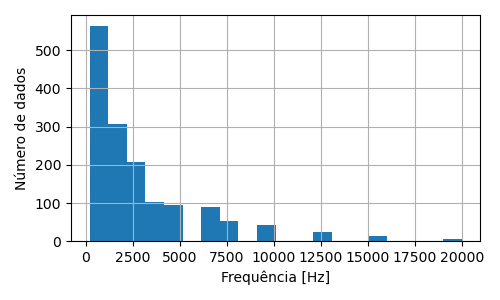

<IPython.core.display.Javascript object>


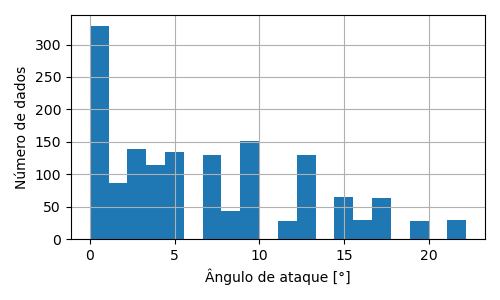

<IPython.core.display.Javascript object>


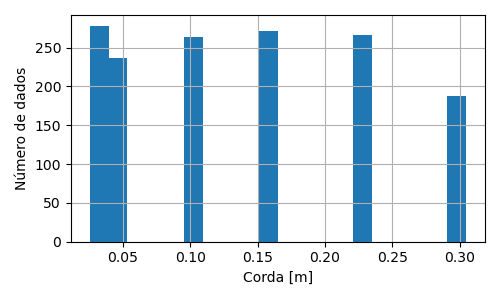

<IPython.core.display.Javascript object>


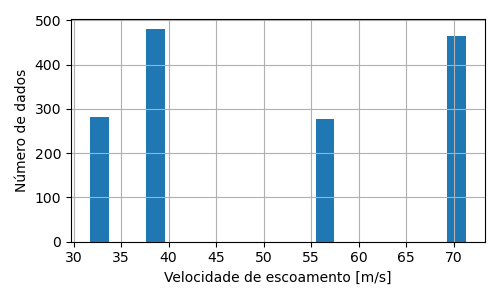

<IPython.core.display.Javascript object>


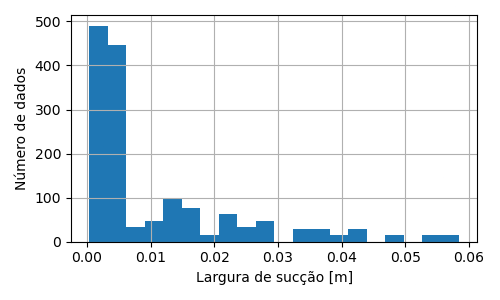

<IPython.core.display.Javascript object>


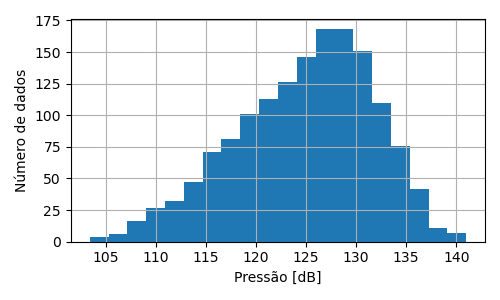

<IPython.core.display.Javascript object>

In [ ]:
for i in range(df.columns.size):
    plt.figure(figsize=(5, 3))
    df[df.columns[i]].hist(bins=20)
    plt.xlabel(legendas[i])
    plt.ylabel("Número de dados")
    plt.tight_layout()

# Matriz de correlação

In [ ]:
df.corr()

,freq,ang,corda,vel,larg_suc,press
freq,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
ang,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
corda,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
vel,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
larg_suc,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
press,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


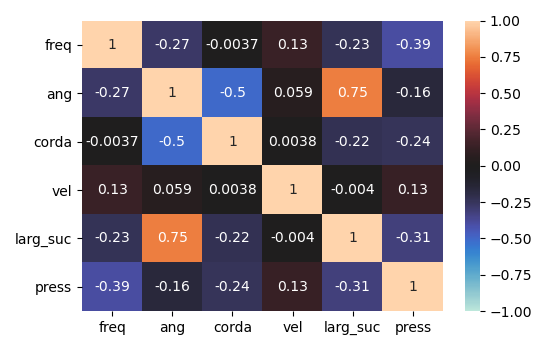

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(5.5, 3.5))
sns.heatmap(
    df.corr(), annot=True, cmap="icefire", center=0, vmin=-1, vmax=1,
)
plt.tight_layout()
# plt.savefig("teste.svg", format="svg")

**Correlação forte entre variáveis observada apenas para Ângulo de ataque x Largura de sucção (0.75)**  
*Correlação considerável entre Ângulo de ataque e Tamanho da Corda (-0.5)*  

Os parâmetros Frequência, Largura de Sucção e Tamanho de Corda, nesta ordem, aparentam ser mais importantes para a determinação da Pressão/intensidade sonora.  
Ângulo de Ataque e Velocidade possuem baixa correlação com a saída.

### Conclusão
Ângulo de ataque aparenta ser o fator de menor relevância no ensaio realizado, visto que possui grande correlação com outros dados de entrada (Largura de succção e Tamanho de Corda) e baixa correlação com a saída.

# Gráficos originais

## Entrada x Saída

<IPython.core.display.Javascript object>


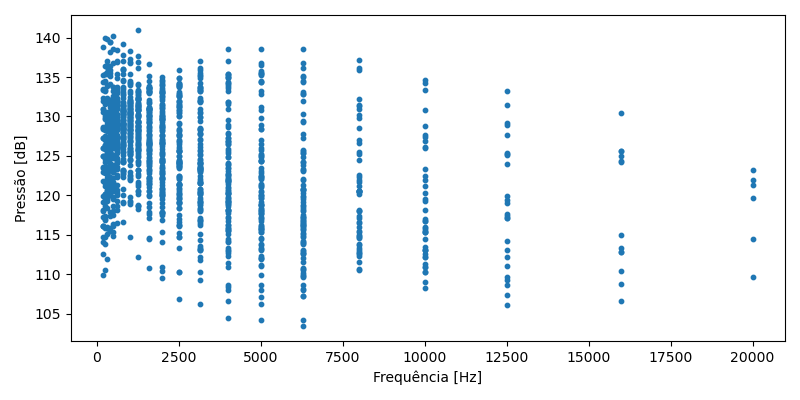

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.freq, df.press, s=10)
plt.xlabel("Frequência [Hz]")
plt.ylabel("Pressão [dB]")

plt.tight_layout()

**Aparenta haver correlação entre baixas Frequências e a Pressão resultante (embora as variações na frequência possam ser decorrentes de condições mais desafiadoras no ensaio). Para frequências maiores que 1000 Hz, a correlação não é perceptível**  
Além disso, foi observado menor número de testes realizados nas frequências mais altas (a partir de 16 MHz)

<IPython.core.display.Javascript object>


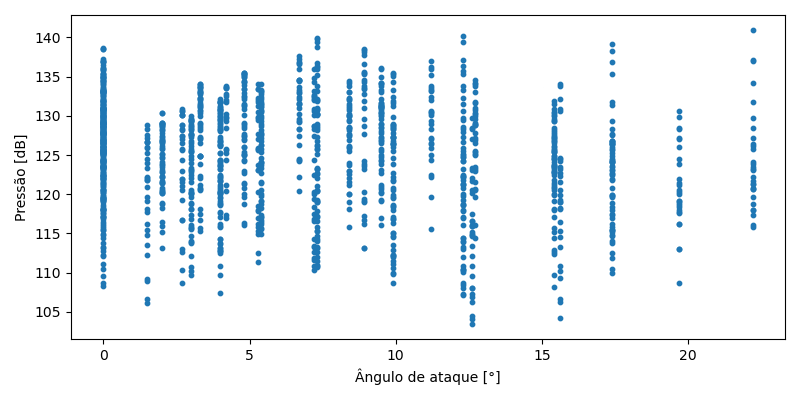

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.ang, df.press, s=10)
plt.xlabel("Ângulo de ataque [°]")
plt.ylabel("Pressão [dB]")

plt.tight_layout()

<IPython.core.display.Javascript object>


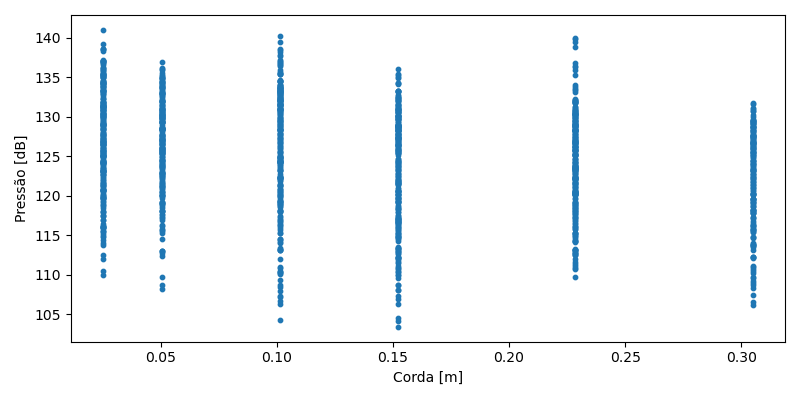

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.corda, df.press, s=10)
plt.xlabel("Corda [m]")
plt.ylabel("Pressão [dB]")

plt.tight_layout()

<IPython.core.display.Javascript object>


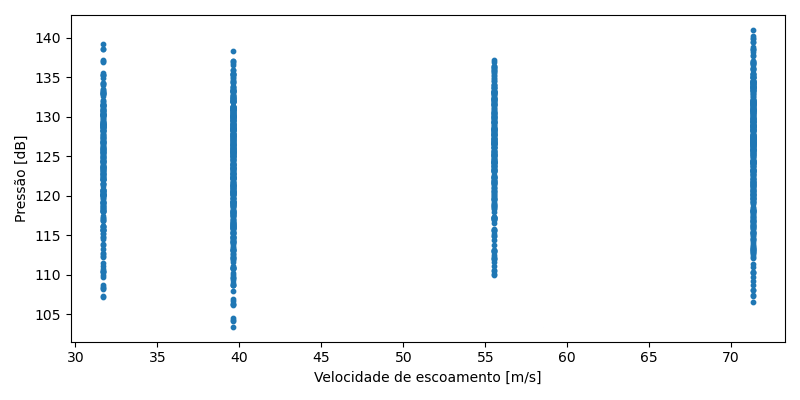

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.vel, df.press, s=10)
plt.xlabel("Velocidade de escoamento [m/s]")
plt.ylabel("Pressão [dB]")

plt.tight_layout()

<IPython.core.display.Javascript object>


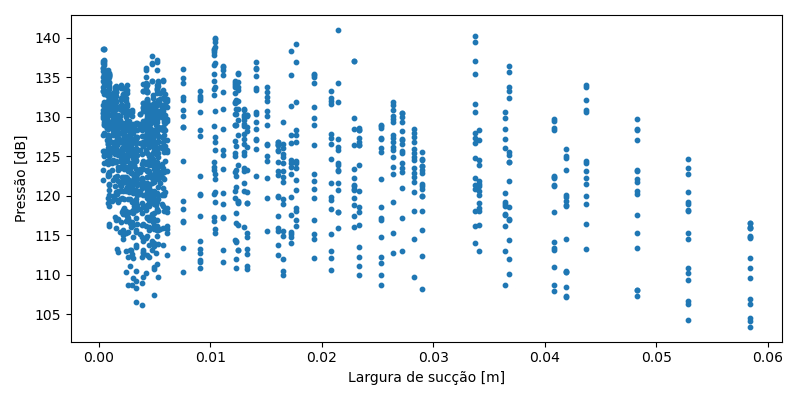

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.larg_suc, df.press, s=10)
plt.xlabel("Largura de sucção [m]")
plt.ylabel("Pressão [dB]")

plt.tight_layout()

**Foi observada correlação entre Largura de Sucção e Pressão**

## Entrada x Entrada

### Frequência

<IPython.core.display.Javascript object>


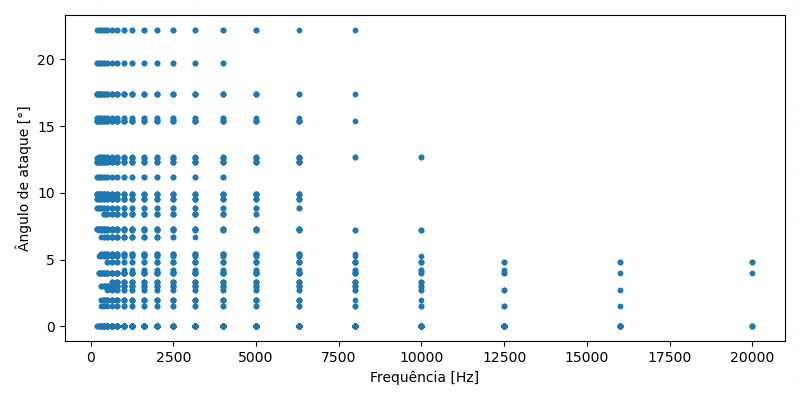

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.freq, df.ang, s=10)
plt.xlabel("Frequência [Hz]")
plt.ylabel("Ângulo de ataque [°]")

plt.tight_layout()

<IPython.core.display.Javascript object>


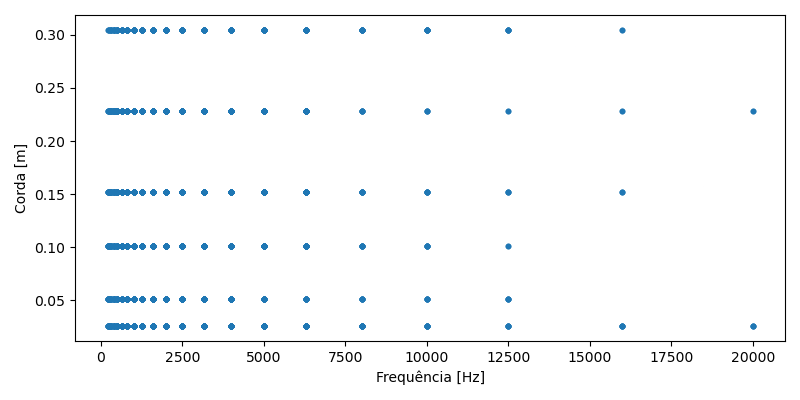

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.freq, df.corda, s=10)
plt.xlabel("Frequência [Hz]")
plt.ylabel("Corda [m]")

plt.tight_layout()

<IPython.core.display.Javascript object>


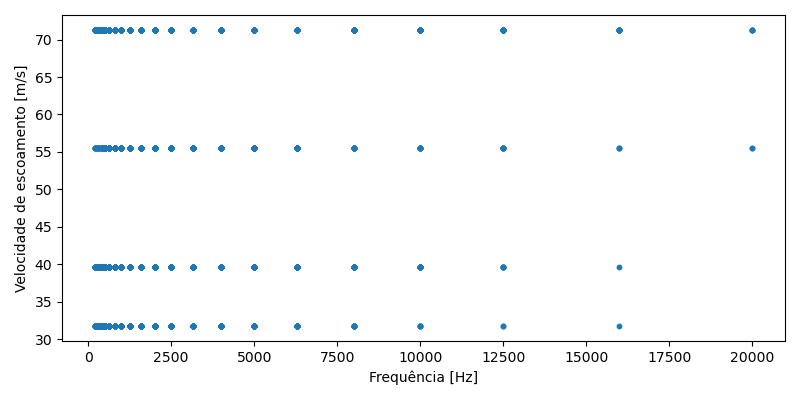

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.freq, df.vel, s=10)
plt.xlabel("Frequência [Hz]")
plt.ylabel("Velocidade de escoamento [m/s]")

plt.tight_layout()

<IPython.core.display.Javascript object>


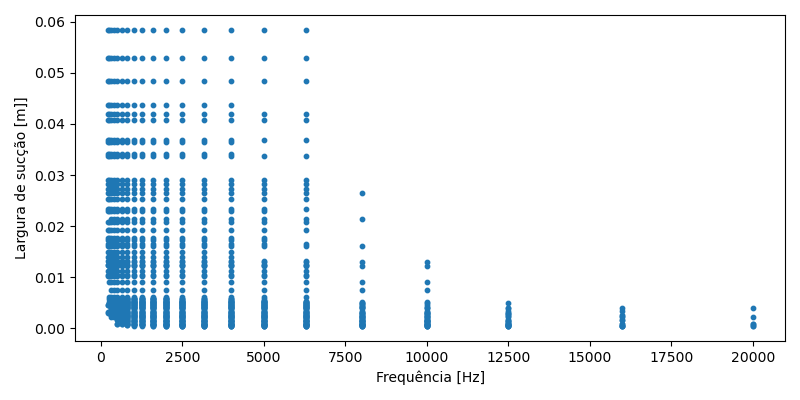

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.freq, df.larg_suc, s=10)
plt.xlabel("Frequência [Hz]")
plt.ylabel("Largura de sucção [m]]")

plt.tight_layout()

### Ângulo de ataque

<IPython.core.display.Javascript object>


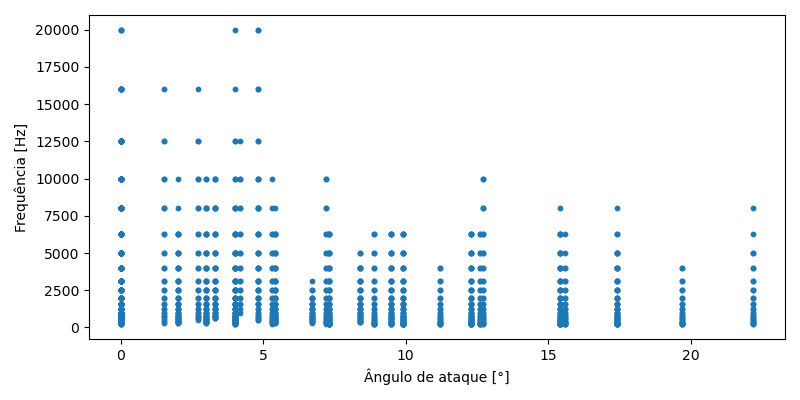

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.ang, df.freq, s=10)
plt.xlabel("Ângulo de ataque [°]")
plt.ylabel("Frequência [Hz]")

plt.tight_layout()

<IPython.core.display.Javascript object>


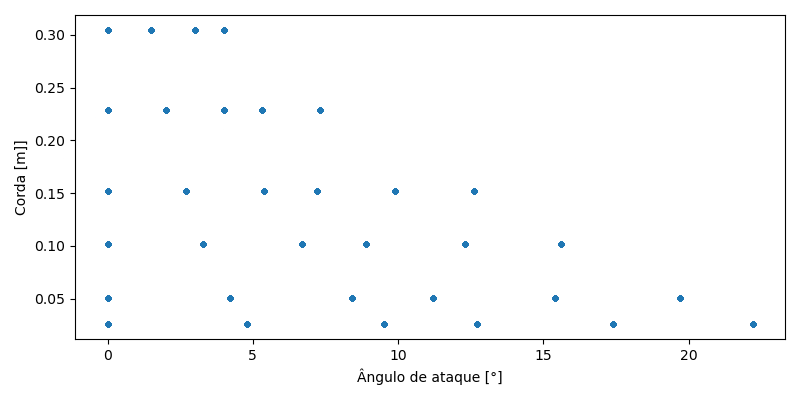

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.ang, df.corda, s=10)
plt.xlabel("Ângulo de ataque [°]")
plt.ylabel("Corda [m]]")

plt.tight_layout()

**Foi observada correlação entre Ângulo de Ataque e Tamanho da Corda**

<IPython.core.display.Javascript object>


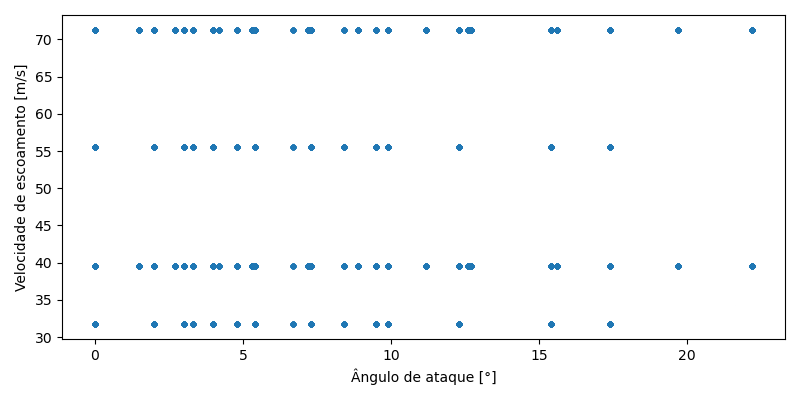

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.ang, df.vel, s=10)
plt.xlabel("Ângulo de ataque [°]")
plt.ylabel("Velocidade de escoamento [m/s]")

plt.tight_layout()

<IPython.core.display.Javascript object>


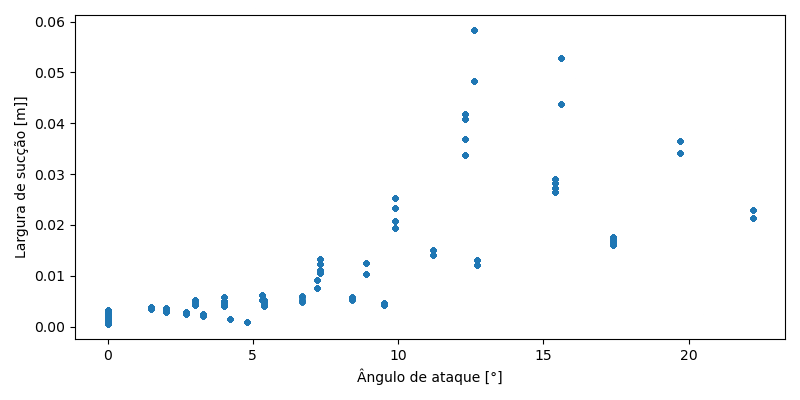

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df.ang, df.larg_suc, s=10)
plt.xlabel("Ângulo de ataque [°]")
plt.ylabel("Largura de sucção [m]]")

plt.tight_layout()

**Foi observada correlação entre Ângulo de Ataque e Largura de Sucção**

## Regressão Linear

### Com todas as variáveis de entrada

In [ ]:
X = df.drop("press", axis=1)  # Dataframe com entradas
y = df["press"]  # Série com saídas
display(X.head(), y.head())

,freq,ang,corda,vel,larg_suc
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: press, dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
# Separação dos dados para treinamento e teste
frac = 0.2  # fração para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=frac)
print(f"Percentual de dados para treinamento: {100*frac:.0f}%")
print(f"Total de conjuntos de dados: {df.shape[0]}")
print(f"Nº de conjuntos para treinamento: {X_train.shape[0]}")
print(f"Nº de conjuntos para teste: {X_test.shape[0]}")

Percentual de dados para treinamento: 20%
Total de conjuntos de dados: 1503
Nº de conjuntos para treinamento: 300
Nº de conjuntos para teste: 1203


<IPython.core.display.Javascript object>

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr_og = regr
y_pred = regr.predict(X_test)

eam = mean_absolute_error(y_test, y_pred)
eqm = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Erro absoluto médio: {eam}")
print(f"Erro quadrático médio: {eqm}")
print(f"Coeficiente de determinação: {R2}")

Erro absoluto médio: 3.7872841024986768
Erro quadrático médio: 23.4426859977183
Coeficiente de determinação: 0.5077874407614835


<IPython.core.display.Javascript object>

In [ ]:
print(regr.coef_)
print(regr.intercept_)

[-1.17124109e-03 -4.54072092e-01 -3.66140891e+01  1.07874092e-01
 -1.48016960e+02]
132.4481460773539


<IPython.core.display.Javascript object>

**Pelo baixo valor do coeficiente de determinação (R²), conclui-se que uma regressão linear não representa adequadamente o sistema**  
Ainda assim, pode ser interessante observar a variação dos coeficientes de avaliação ao reduzir as variáveis de entrada

### Utilizando as variáveis de maior correlação com a saída
- Frequência, Tamanho da Corda e Largura de Sucção

In [ ]:
X_train.head()

,freq,ang,corda,vel,larg_suc
111,10000,3.0,0.3048,71.3,0.004257
622,2500,7.2,0.1524,39.6,0.009092
1069,500,9.5,0.0254,55.5,0.004328
515,1600,2.7,0.1524,71.3,0.002439
321,1250,4.0,0.2286,55.5,0.004286


<IPython.core.display.Javascript object>

In [ ]:
X_train_fcl = X_train.drop(["ang", "vel"], axis=1)
X_test_fcl = X_test.drop(["ang", "vel"], axis=1)
X_train_fcl.head()

,freq,corda,larg_suc
111,10000,0.3048,0.004257
622,2500,0.1524,0.009092
1069,500,0.0254,0.004328
515,1600,0.1524,0.002439
321,1250,0.2286,0.004286


<IPython.core.display.Javascript object>

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train_fcl, y_train)
y_pred = regr.predict(X_test_fcl)

eam = mean_absolute_error(y_test, y_pred)
eqm = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Erro absoluto médio: {eam}")
print(f"Erro quadrático médio: {eqm}")
print(f"Coeficiente de determinação: {R2}")

Erro absoluto médio: 4.09589511467292
Erro quadrático médio: 26.939505285230375
Coeficiente de determinação: 0.43436674268667896


<IPython.core.display.Javascript object>

**Ao remover o Ângulo de Ataque e a Velocidade de Escoamento, os coeficientes de avaliação são pouco influenciados, confirmando a baixa influência destas variáveis (por si só) no resultado**

### Teste: Substituir Tamanho da Corda por Ângulo de Ataque (correlação = 0.50)
- Frequência, Ângulo de Ataque e Largura de Sucção

In [ ]:
X_train_fal = X_train.drop(["corda", "vel"], axis=1)
X_test_fal = X_test.drop(["corda", "vel"], axis=1)
X_train_fal.head()

,freq,ang,larg_suc
111,10000,3.0,0.004257
622,2500,7.2,0.009092
1069,500,9.5,0.004328
515,1600,2.7,0.002439
321,1250,4.0,0.004286


<IPython.core.display.Javascript object>

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train_fal, y_train)
y_pred = regr.predict(X_test_fal)

eam = mean_absolute_error(y_test, y_pred)
eqm = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Erro absoluto médio: {eam}")
print(f"Erro quadrático médio: {eqm}")
print(f"Coeficiente de determinação: {R2}")

Erro absoluto médio: 4.623395621011755
Erro quadrático médio: 32.598114043180125
Coeficiente de determinação: 0.3155561977367096


<IPython.core.display.Javascript object>

**Apesar da correlação de 0,5 entre Tamanho da Corda e Ângulo de Ataque, o Coeficiente de Determinação piora considerávelmente com a substituição**

### Teste: Substituir Largura de Sucção por Ângulo de Ataque (correlação = 0.75)
- Frequência, Ângulo de Ataque e Tamanho da Corda

In [ ]:
X_train_fac = X_train.drop(["larg_suc", "vel"], axis=1)
X_test_fac = X_test.drop(["larg_suc", "vel"], axis=1)
X_train_fac.head()

,freq,ang,corda
111,10000,3.0,0.3048
622,2500,7.2,0.1524
1069,500,9.5,0.0254
515,1600,2.7,0.1524
321,1250,4.0,0.2286


<IPython.core.display.Javascript object>

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train_fac, y_train)
y_pred = regr.predict(X_test_fac)

eam = mean_absolute_error(y_test, y_pred)
eqm = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Erro absoluto médio: {eam}")
print(f"Erro quadrático médio: {eqm}")
print(f"Coeficiente de determinação: {R2}")

Erro absoluto médio: 4.128154084327183
Erro quadrático médio: 27.50805744215708
Coeficiente de determinação: 0.4224291809137357


<IPython.core.display.Javascript object>

**O Ângulo de Ataque substitui a Largura de Sucção causando apenas uma leve piora nos coeficientes de avaliação. Contudo, pela Largura de Sucção possuir maior correlação com a Pressão, esta ainda é preferida**

## Regressão polinomial

In [ ]:
ordens = np.arange(1, 5)
metricas = pd.DataFrame(0, index=ordens, columns=["EQM"])
y_poli_pred_dict = {}
model = {}

for ordem in ordens:
    poly_features = PolynomialFeatures(degree=ordem)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)
    regr_poly = linear_model.LinearRegression(fit_intercept=False)
    model[ordem] = regr_poly.fit(X_train_poly, y_train)

    y_poli_pred_dict[ordem] = model[ordem].predict(X_test_poly)
    metricas.loc[ordem, "EQM"] = mean_squared_error(y_test, y_poli_pred_dict[ordem])

<IPython.core.display.Javascript object>

In [ ]:
X_train.head()

,freq,ang,corda,vel,larg_suc
111,10000,3.0,0.3048,71.3,0.004257
622,2500,7.2,0.1524,39.6,0.009092
1069,500,9.5,0.0254,55.5,0.004328
515,1600,2.7,0.1524,71.3,0.002439
321,1250,4.0,0.2286,55.5,0.004286


<IPython.core.display.Javascript object>

In [ ]:
metricas

,EQM
1,23.442686
2,18.411371
3,15.475790
4,27928.972771


<IPython.core.display.Javascript object>

**Checagem: Coeficientes da regressão linear coincidem com da polinomial de ordem 1?**

In [ ]:
print(regr_og.intercept_)
print(regr_og.coef_)

132.4481460773539
[-1.17124109e-03 -4.54072092e-01 -3.66140891e+01  1.07874092e-01
 -1.48016960e+02]


<IPython.core.display.Javascript object>

In [ ]:
model[1].coef_

array([ 1.32448146e+02, -1.17124109e-03, -4.54072092e-01, -3.66140891e+01,
        1.07874092e-01, -1.48016960e+02])

<IPython.core.display.Javascript object>

**Conclusão: Coeficientes coincidem, comprovando a metodologia da regressão polinomial. Contudo, métricas de validação estão muito ruins. Logo, não é possível aproximar o modelo por regressão polinomial**